<a href="https://colab.research.google.com/github/lukeolson/mse598dm-python-data/blob/main/visualizing/scrubbing-data-visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/lukeolson/mse598dm-python-data/raw/main/visualizing/random_map.png" width="700px;" alt="quad"/>

#  Scrubbing data and visualizing

## Objectives

### Objectives

1. Retrieve data and place in a pandas dataframe
2. Determine modifications needed in the data 
3. Match the data to visualization package

### Example Questions

1. How can we retrieve data from a webpage?
2. How can we parse hhtml?
3. What is a MultiIndex in Pandas?
4. What is a Choropleth map?

## Highlevel topics

- Data retrieval
- Data storage
- Data manipulation
- Visualization

## What to hand in
- As far as you can get!
- What did you learn about scrubbing data today?
    - 1. ...
    - 2. ...
    - 3. ...

## Synopsis

You're a structural engineer working on a team that analyses the bridge infrastructure in the US.  To make a convincing argument, you are constructing a map of the current bridge conditions across the US.

#### Your Task

Your goal is to plot the bridge conditions at the state level.

## Datasets

In this session two datasets will be used:
- Bridge Condition by Highway System 2019
    - https://www.fhwa.dot.gov/bridge/nbi/no10/condition19.cfm
- Bridge Condition by County 2019
    - https://www.fhwa.dot.gov/bridge/nbi/no10/county19.cfm
- In addition you will use the state/county level geo files:
    - `us-states.json`: https://github.com/python-visualization/folium/tree/master/examples/data
    - http://eric.clst.org/tech/usgeojson/

## Getting Started

We will introduce four new packages in this lesson:

- `requests` is a package the makes URL requests *easy*.  Give it a URL and it retrieves the page.
- `bs4` or BeautifulSoup parses an html file and places it in a convenient structure
- `json` is a package for reading structured JSON files
- `folium` is one of many packages that can be used to plot information on a geographical map

In [5]:
import folium
import os
import pandas as pd
import bs4
import requests
import json
from IPython.display import HTML, display

In [2]:
m = folium.Map(
    location=[40.114942, -88.226492],
    #tiles='Stamen Toner',
    tiles="Stamen Terrain",
    zoom_start=13
)

m

## First grab the webpage

Here we'll do two things:

1. retrieve the raw html of the webpage; and
2. parse the html to make a structured `soup`

In [3]:
url = 'https://www.fhwa.dot.gov/bridge/nbi/no10/condition21.cfm'
r = requests.get(url)                  # grab the html source
html = r.text                          # as text
soup = bs4.BeautifulSoup(html, 'lxml') # make a parseable "tree" of html

## <font color="red"> ____________________ </font>
We can do any number of things with `soup` at this point.  We can scrub for emails, find links, extract figures, etc.  In this case we wish to find all of the tables in the html.  `<table>` and `<table class="something">` are both examples of tags that we wish to find --- bs4 makes this easy -- try it with `find_all` (https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigating-using-tag-names)

```
table = ...
```
## <font color="red"> Try it! $\downarrow$</font>

In [ ]:
table = soup.find_all('?????')
display(HTML(str(table)))

## <font color="red"> ____________________ </font>
If you have `table`, you can `find_all` on the resulting markup.
```
rows = table.find_all()
```

Use this to find all rows (marked with `tr`) in the table.

## <font color="red"> Try it! $\downarrow$</font>

In [ ]:
rows = table.find_all('?????')

Let's print it:

In [ ]:
print(rows[0])
print(rows[1])
print(rows[2])

### One approach

One approach is to zip through the rows, then parse each of the columns.  We may do this like the following:

In [ ]:
for row in rows:
    
    # find all 'th' headers
    state_name = row.find('th', {"class": "left"})
    if state_name is not None:
        
        # get the state name
        state_name = state_name.text
        print(state_name)
        
        # get the next four data rows
        count = row.findAll('td')[:4]
        count = [int(c.text.replace(',','')) for c in count]
        print(count)

### Another (easier) approach

## <font color="red"> ____________________ </font>
The previous approach is often necessary.  Dirty data, incomplete html, different formats, etc often force us to parse the html by hand.  However in the case of a table, Pandas can be used directly:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html

How can we use pandas to read the soup table?
## <font color="red"> Try it! $\downarrow$</font>

In [ ]:
df = pd.read_html(?????)[0]

Print the dataframe:

In [ ]:
df

Now lets just take the state name and the bridge counts to make the dataframe a bit more manageable:

In [ ]:
dfcounts = df[['State','Bridge Counts']].copy()
dfcounts

### A MultiIndex?!

If we take a look a the column names we run into another type in Pandas: a MultiIndex.

In [ ]:
dfcounts.columns

One easy thing to do in this case (mainly to make referencing a specific column easier) is to reduce to the column header to a simple `Index`.  Here we'll just use the second level of the MultiIndex:

In [ ]:
dfcounts.columns = dfcounts.columns.get_level_values(1)
print(dfcounts.columns)
dfcounts

### Look ahead

Looking ahead to our mapping, we'll be using a GEO file, and each state name will be in the form of `Illinois` or `New Mexico`, etc.  However, in the data frame of bridge data, notice that each state name is in all caps. To fix this, we'll use the `.title()` command and return to lesson1:

In [ ]:
'NEW MEXICO'.title()

## <font color="red"> ____________________ </font>

Let's use this to change the string in the `State` column:

## <font color="red"> Try it! $\downarrow$</font>

In [6]:
def f(x):
    pass # <-- have it return something
dfcounts['State'] = dfcounts['State'].apply(f)

NameError: name 'dfcounts' is not defined

Now look at our modified data:

In [ ]:
dfcounts

# Your Turn:  Displaying the Data on a Map

Your job is to visualize the information about the bridges on a map (choropleth visualization).  To get you started, this section will go through some examples first of some basic maps with other data.  Go through these examples to get an understanding for the map visualization then complete the 2 tasks at the bottom.

## Example 1:  Our first map

Let's make a map instance with `folium`. Here we set the lat/long coordinates to the Beckman Quad.  The tiles parameter is used to determine they style of the map.  

(You can use `folium.Map?` in this notebook to experiment with different map types -- neat!).  

In [ ]:
folium.Map?

In [ ]:
m = folium.Map(
    location=[40.114942, -88.226492],
    tiles='Stamen Toner',
    zoom_start=13
)

m

The above example illustrated a map for some specific lat/long coordinates.  In practice, we'll want to display some information on the map.  We'll start in the next example with a simple visualization of data on a map.

## Example 2:  Starting Map with State Data (3 states)

Let's start with a basic visualization of data for 3 states: Iowa, Illinois, and Colorado.  Let's assume we have the following dataframe with some data for a few states. 

In [10]:
df = pd.DataFrame(
    [
        ['Iowa', 'Illinois', 'Colorado'],
        [50, 1, 100]],
    index=['State', 'Some Value']
).T

print(df)

      State Some Value
0      Iowa         50
1  Illinois          1
2  Colorado        100


### State JSON Info

To plot on map with Folium, a JSON file is used to describe the polygons that will represent each state.  For example,  Illinois is composed of a list of coordinates -- [check it out](https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json):

In [7]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
r = requests.get(url) # grab the source from the url
state_geo = r.json()  # convert to `json`
state_geo['features'][12]

{'type': 'Feature',
 'id': 'IL',
 'properties': {'name': 'Illinois'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-90.639984, 42.510065],
    [-88.788778, 42.493634],
    [-87.802929, 42.493634],
    [-87.83579, 42.301941],
    [-87.682436, 42.077386],
    [-87.523605, 41.710431],
    [-87.529082, 39.34987],
    [-87.63862, 39.169131],
    [-87.512651, 38.95553],
    [-87.49622, 38.780268],
    [-87.62219, 38.637868],
    [-87.655051, 38.506421],
    [-87.83579, 38.292821],
    [-87.950806, 38.27639],
    [-87.923421, 38.15042],
    [-88.000098, 38.101128],
    [-88.060345, 37.865619],
    [-88.027483, 37.799896],
    [-88.15893, 37.657496],
    [-88.065822, 37.482234],
    [-88.476592, 37.389126],
    [-88.514931, 37.285064],
    [-88.421823, 37.153617],
    [-88.547792, 37.071463],
    [-88.914747, 37.224817],
    [-89.029763, 37.213863],
    [-89.183118, 37.038601],
    [-89.133825, 36.983832],
    [-89.292656, 36.994786],
    [-89.517211, 37.279587],
    [-89.435057, 37.34

## Just plot it
We could just plot this polygon data on our own:

(-91.705796, -87.29576399999999, 36.70752035, 42.786376649999994)

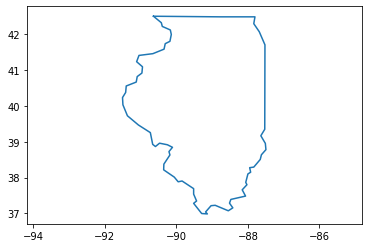

In [8]:
import matplotlib.pyplot as plt
import numpy as np
coords = state_geo['features'][12]['geometry']['coordinates'][0]
coords = np.array(coords)
plt.plot(coords[:,0], coords[:,1])
plt.axis('equal')

We printed just Illinois above, but  `state_geo` contains the polygons for each of the states.

### Creating Map with State Data

To create a Choropleth, we first initialize a map with folium like we did in the basic example above.  Then, we call `folium.Choropleth()`. 

**What is a Choropleth?** https://en.wikipedia.org/wiki/Choropleth_map

The call to set the `Choropleth` map has 4 important entries:

- `geo_data=state_geo`, here we set the geo data.
- `data=df`, here we set the data *source* (the stuff we'll plot on each state)
- `columns=['State', 'Some Value']`, where to find the state name or state id and the numbers to visualize (in `data`)
- `key_on='feature.properties.name'`, how the entries are represented in the JSON.  For the state geo_data json file, this will be either `'feature.id'` (abbreviation) or `'feature.properties.name'` (name), depending on whether our dataframe uses state names or abbreviations. 

The other parameters control specifics of looks of the visualization (opacity, coloring).

In [11]:
m = folium.Map(location=[44, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=df,
    columns=['State', 'Some Value'],
    key_on='feature.properties.name',
    fill_color='Reds',
    fill_opacity=0.6,
    line_opacity=0.2,
).add_to(m)

folium.LayerControl().add_to(m)

m

## Example 3:  Full Example with Unemployment Data
## <font color="red"> ____________________ </font>

For this next part we'll take straight out of the Folium examples.

As before, we use the same json state geo data.  This example reads in unemployment data into a pandas dataframe.  The call to `folium.Choropleth()` is roughly the same as the above, except this dataframe, `state_data`, uses abbreviations not full names, so `key_on=` a different value.  Additionally, the coloring is a little different and the colorbar is labeled.

## <font color="red"> Try it! $\downarrow$</font>

In [12]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
state_geo = requests.get(url).json()

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(url)

m = folium.Map(location=[48, -102], zoom_start=5)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    # vvvv fill this in
    data=None,
    columns=None,
    key_on=None,
    #######
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m


# Your Tasks:
Now that you've seen some examples, it's time for you to visualize the bridge data that is the topic of this lesson.

Your task is to create 2 different choropleth visualizations based on the bridge data (each is described below).

## Task \#1:
## <font color="red"> ____________________ </font>

Create a choropleth visualization that illustrates the number of bridges in each state.

Hint:  Think about what the visualization should look like based on the data.  If your visualized results are not as expected, it may help to look at the dataframe to identify what is happening.  Notice any rows that aren't simply state data?
## <font color="red"> Try it! $\downarrow$</font>

In [ ]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
state_geo = requests.get(url).json()

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    # fill this in vvvv
    data=None,
    columns=None,
    key_on=None,
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

folium.LayerControl().add_to(m)

m

## Task \#2

## <font color="red"> ____________________ </font>
Create a different choropleth visualization that illustrates the percentage of bridges in each state rated as poor.  

Hint:  this value is not currently in the dataframe of bridge data -- you'll need to compute it first

## <font color="red"> Try it! $\downarrow$</font>

In [ ]:
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=dfcounts,
    columns=['State', 'Percent in Poor Condition'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percent of Bridges Ranked as Poor (%)'
).add_to(m)

folium.LayerControl().add_to(m)
m